# Deep Learning (Advanced)

## 1. Activation Functions & Regularization

### 🔹 Activation Functions

**Concept:**
In neural networks, activation functions determine whether a neuron should be activated or not. Without them, no matter how many layers we use, the model would behave like a simple linear function and won't be able to learn complex data patterns.

### 📌 Common Activation Functions:

* **ReLU (Rectified Linear Unit):**

  * Formula: $f(x) = \max(0, x)$
  * Very fast and effective. Used widely in deep learning models.
* **Sigmoid:**

  * Formula: $f(x) = \frac{1}{1 + e^{-x}}$
  * Squashes input to a range between 0 and 1. Great for probabilities.
* **Tanh (Hyperbolic Tangent):**

  * Output range: -1 to 1, centered at zero. Often better than sigmoid in practice.
* **Softmax:**

  * Turns output into probability distribution for multi-class classification.

### 🔍 Analogy:

Think of neurons as light switches:

* **ReLU:** On or off
* **Sigmoid:** Dimmer switch – gradual brightness
* **Tanh:** Dimmer with both negative and positive brightness

---

### 🔹 Regularization

**Concept:**
Regularization techniques are used to prevent **overfitting** — when a model memorizes training data but fails to generalize to new data.

### 📌 Types of Regularization:

* **Dropout:**

  * Randomly deactivates neurons during training.
  * Prevents over-reliance on specific features.
* **L1 Regularization (Lasso):**

  * Adds absolute value of weights to the loss function (encourages sparsity).
* **L2 Regularization (Ridge):**

  * Adds squared value of weights to the loss function (encourages smaller weights).

### 🔍 Analogy:

Dropout is like preparing for exams using different subsets of your notes each time — ensuring you truly understand all topics, not just memorize a fixed path.

### ✅ Summary:

* **Activation functions** introduce non-linearity and control the output of neurons.
* **Regularization techniques** like dropout and L1/L2 help reduce overfitting and improve generalization.

### 🔧 Code Example: Binary Classifier for Customer Churn

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

---

## 2. Optimizers & Batch Normalization

### 🔹 Optimizers

**Concept:**
Optimizers adjust the weights of a model to minimize the loss function using gradient descent.

### 📌 Types of Optimizers:

* **SGD (Stochastic Gradient Descent):**

  * Simple, but may be slow or get stuck in local minima.
* **Momentum:**

  * Adds velocity to SGD to help overcome local minima.
* **Adam (Adaptive Moment Estimation):**

  * Combines momentum and RMSProp (adaptive learning rates).
  * Often used by default in deep learning.

### 🔍 Analogy:

Climbing a hill blindfolded:

* **SGD:** Takes steps based only on current slope
* **Adam:** Remembers past slopes to guide better steps

---

### 🔹 Batch Normalization

**Concept:**
Normalizes the inputs of each layer in mini-batches. Helps:

* Accelerate training
* Stabilize learning
* Reduce the need for dropout or aggressive regularization

### 🔍 Analogy:

Like a thermostat keeping temperature optimal — batch normalization ensures layers get data that's "just right."

### ✅ Summary:

* **Optimizers** determine how weights are updated during training.
* **Batch normalization** helps the network learn faster and more reliably.

### 🔧 Code Example: Digit Recognizer with BatchNorm

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 27ms/step - accuracy: 0.9184 - loss: 0.2793 - val_accuracy: 0.9774 - val_loss: 0.0740
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 25ms/step - accuracy: 0.9849 - loss: 0.0483 - val_accuracy: 0.9818 - val_loss: 0.0533
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9907 - loss: 0.0279 - val_accuracy: 0.9804 - val_loss: 0.0696


---

## 3. Data Augmentation & Evaluation

### 🔹 Data Augmentation

**Concept:**
Increases training data diversity by creating altered versions of existing images.

### 📌 Common Augmentations:

* Rotation, flipping
* Zoom, cropping
* Shifting, brightness/contrast changes

### 🔍 Analogy:

Like solving practice questions in multiple formats — improves robustness.

---

### 🔹 Model Evaluation – Confusion Matrix

**Concept:**
While accuracy is important, confusion matrices show detailed performance across prediction categories.

### 📌 Key Terms:

* **True Positive (TP):** Correctly predicted positive
* **False Positive (FP):** Incorrectly predicted positive
* **True Negative (TN):** Correctly predicted negative
* **False Negative (FN):** Incorrectly predicted negative

### 🔍 Analogy:

It's like marking an exam — not just score, but knowing exactly which questions were missed.

### ✅ Summary:

* Data Augmentation helps prevent overfitting by creating more varied inputs.
* Confusion Matrix gives deeper insights into classification errors.

### 🔧 Code Example: Fashion MNIST with Augmentation + Evaluation

Epoch 1/3


D:\python\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.7220 - loss: 0.7451 - val_accuracy: 0.8251 - val_loss: 0.4809
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.8161 - loss: 0.4840 - val_accuracy: 0.8503 - val_loss: 0.4162
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 75ms/step - accuracy: 0.8305 - loss: 0.4399 - val_accuracy: 0.8626 - val_loss: 0.3824
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


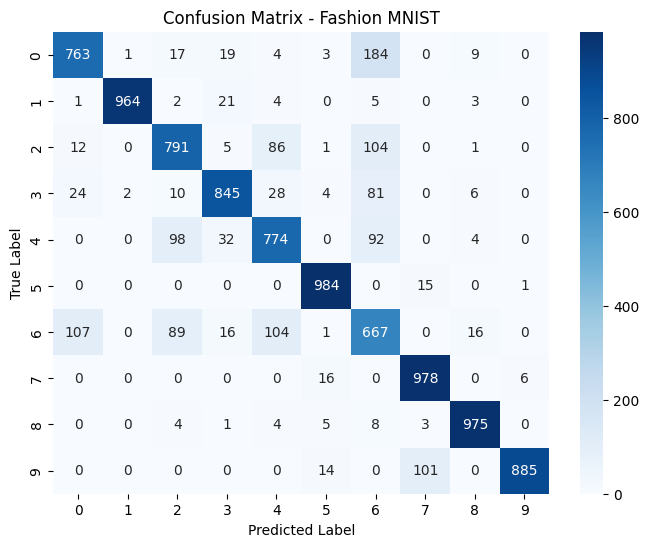

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Fashion MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Reshaping and scaling
train_images = train_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Data Augmentation: rotation, zoom, shift
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit data generator on training data
datagen.fit(train_images)

# Define model architecture
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer and sparse categorical cross-entropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using augmented data
model.fit(datagen.flow(train_images, train_labels, batch_size=64),
          epochs=3,
          validation_data=(test_images, test_labels))

# Predict the results on the test set
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_labels, y_pred_classes)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()

---
## 4. Transfer Learning

### 🔹 Concept:

Transfer learning leverages pre-trained models (e.g., VGG, MobileNet, ResNet) trained on large datasets like ImageNet, adapting them to new tasks with limited data.

### 📌 Types of Transfer Learning:

* **Feature Extraction:** Freeze the pre-trained model, only train the new classifier layers.
* **Fine-tuning:** Unfreeze some upper layers of the base model and train them along with the new layers.

### 🔍 Analogy:

Like hiring a professional chef — already skilled, only needs training on your specific menu.

### ✅ Benefits:

* Requires less data
* Speeds up training
* Yields better performance on small datasets

### 🔧 Code Example: Medical Image Classifier Using MobileNetV2

In [3]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=(128,128,3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

---

### ✅ Final Thoughts:

* Use **activation functions** and **regularization** for better control and generalization.
* Pick the right **optimizer** and add **batch normalization** for faster, more stable training.
* Apply **data augmentation** to improve generalization and use **confusion matrices** for better evaluation.
* Leverage **transfer learning** to solve problems effectively when data is limited.

These techniques are essential for real-world deep learning tasks. Practice them with different datasets to build your expertise!